# 第2章 预备知识

## 2.1 数据操作

*张量（tensor）*：n维数组（n阶数组、具有n个轴的数组）

### 2.1.1 入门

*向量（vector）*：具有1个轴的张量  
*矩阵（matrix）*：具有2个轴的张量  

张量中的每个值称为张量的*元素*


In [1]:
import torch

x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [2]:
# 张量的形状 shape
x.shape  # torch.Size([12])

torch.Size([12])

In [3]:
# 张量的大小 size
x.numel()  # 12

12

In [4]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [5]:
torch.zeros(2, 3, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [6]:
torch.ones(2, 3, 4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [7]:
torch.randn(3, 4)

tensor([[ 0.4546, -0.4257,  0.8136,  1.4538],
        [ 0.2599, -1.0891, -1.0295, -1.1443],
        [-1.9837, -0.4318, -1.2894,  0.4790]])

### 2.1.2 运算符

In [8]:
# 按元素运行 + - *  / **
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [9]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [10]:
# 连接张量
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)  # 按行（轴0）和按列（轴1）连接

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [11]:
# 逻辑运算
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

### 2.1.3 广播机制

不同形状的张量调用广播机制进行按元素操作。

In [12]:
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [13]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.4 索引和切片

第一个元素的索引是 0，最后一个元素的索引是 -1

In [14]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [15]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [16]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.5 节省内存

In [17]:
before = id(Y)
Y = Y + X
id(Y) == before  # False

False

In [18]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))  # id(Z): 1897904303616
Z[:] = X + Y
print('id(Z):', id(Z))  # id(Z): 1897904303616

id(Z): 2586615398624
id(Z): 2586615398624


In [19]:
before = id(X)
X += Y
id(X) == before  # True

True

### 2.1.6 转换为其他Python对象

In [20]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)  # (numpy.ndarray, torch.Tensor)

(numpy.ndarray, torch.Tensor)

### 2.1.7 数据预处理



In [21]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [22]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 2.2.2 处理缺失的值

插值法、删除法


In [23]:
# 插值法
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())  # 用同一列的均值填充NaN
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [24]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### 2.2.3 转换为张量

In [25]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## 2.3 线性代数

### 2.3.1 标量

仅包含一个数值被称为*标量（scalar）*。
标量由只有一个元素的张量表示。

### 2.3.2 向量

向量可以被视为标量值组成的列表。
这些标量值被称为向量的*元素（element）*或*分量（component）*。
在数学上，具有一个轴的张量表示向量。

#### 长度、维度和形状

*维度（dimension）*：向量的长度。
*形状*：一个元素组，列出了张量沿每个轴的长度（维数）。

向量或轴的维度表示向量或轴的长度，即向量或轴的元素数量。
张量的维度表示张量具有的轴数。
张量的某个轴数，就是这个轴的长度。


### 2.3.3 矩阵

In [26]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [27]:
A.T  # 矩阵的转置

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [28]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])  # 对称矩阵
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [29]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [30]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.4 张量

张量是描述具有任意数量轴的n维数组的通用方法。


#### 2.3.5 张量算法的基本性质

*哈达玛积*：两个矩阵的按元素乘法。

In [31]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [32]:
A * B  # 哈达玛积

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

### 2.3.6 降维


In [33]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()  # 计算元素的和

(tensor([0., 1., 2., 3.]), tensor(6.))

In [34]:
A, A.shape, A.sum()

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 tensor(190.))

In [35]:
A_sum_axis0 = A.sum(axis=0)  # 对所有行元素求和
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [36]:
A_sum_axis1 = A.sum(axis=1)  # 对所有列元素求和
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [37]:
A.sum(axis=[0, 1])

tensor(190.)

In [38]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

#### 非降维求和

In [39]:
sum_A = A.sum(axis=1, keepdim=True)
A, sum_A

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]))

In [40]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [41]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 2.3.7 点积

向量x,y的点积为x.Ty（<x,y>）

In [42]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)


(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

### 2.3.8 矩阵-向量积



In [43]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 2.3.9 矩阵-矩阵乘法


In [44]:
B = torch.ones(4, 3)
A, B, torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

### 2.3.10 范数

向量的*范数*表示一个向量的有多大。

L1范数：向量元素的绝对值之和。
L2范数：向量元素平方和的平方根。

#### 范数和目标

在深度学习中，解决最优化问题：*最大化*分配给观测数据的概率；最小化预测值和真实观测值之间的距离。
在线性代数中，向量范数是将向量映射到标量的函数。


In [45]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)  # L2范数

tensor(5.)

In [46]:
torch.abs(u).sum()  # L1范数

tensor(7.)

## 2.4 微积分

逼近法是积分的起源。
微分中最重要的应用是优化问题。

最小化一个损失函数。

可以将拟合模型任务分解为两个关键问题：
* 优化：用模型拟合观察数据的过程。
* 泛化：

### 2.4.1 导数和微分



In [47]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x


def numerial_lim(f, x, h):
    return (f(x + h) - f(x)) / h


h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerial lim={numerial_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerial lim=2.30000
h=0.01000, numerial lim=2.03000
h=0.00100, numerial lim=2.00300
h=0.00010, numerial lim=2.00030
h=0.00001, numerial lim=2.00003


In [48]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize


#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None,
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""

    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axes(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axes(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X) * X
    elif has_one_axes(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


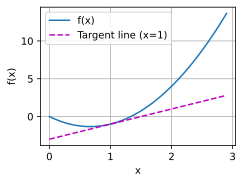

In [49]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Targent line (x=1)'])

### 2.4.2 偏导数

*多元函数*

### 2.4.3 梯度

梯度是一个向量，其分量是多变量函数对于其所有变量的偏导数。

### 2.4.4 链式法则

链式法则可以用来对复合函数求导。


## 2.5 自动微分

深度学习框架通过自动计算导数，即自动微分来加快求导。
实践中，根据设计好的模型，系统会构建一个计算图，来跟踪计算哪些数据通过哪些操作，组合起来产生输出。
自动微分能够随后反向传播梯度。
*反向传播*意味着跟踪整个计算图，填充每个参数的偏导数。

### 2.5.1 例子


In [50]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [51]:
x.requires_grad_(True)  # 等价于x = torch.arange(4.0, requires_grad=True)
x.grad

In [52]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [53]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [54]:
x.grad == 4 * x

tensor([True, True, True, True])

In [55]:
# 默认情况下，PyTorch会累计梯度，需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2 非标量变量的反向传播


### 2.5.3 分离计算


### 2.5.4 Python控制流的梯度计算


## 2.6 概率

### 2.6.1 基本概率论

抽样：从概率分布中抽取样本的过程。
分布
多项分布（multinominal distribution）：将概率分配给一些离散选择的分布。


In [56]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [57]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [58]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([3., 1., 2., 1., 1., 2.])

In [59]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1580, 0.1980, 0.1500, 0.1780, 0.1510, 0.1650])

In [60]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))  # 进行500次实验，每组抽10个样本
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

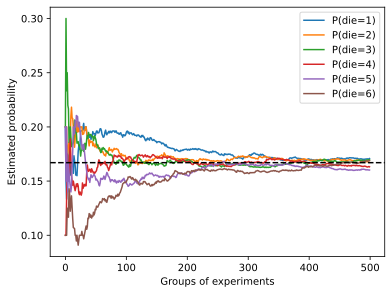

In [61]:

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

#### 1. 概率论公理

样本空间/结果空间
结果
事件
概率
互斥事件

#### 2. 随机变量

离散随机变量
连续随机变量

密度

### 2.6.2 处理多个随机变量

#### 1. 联合概率

#### 2. 条件概率

#### 3. 贝叶斯定理

#### 4. 边际化

#### 5. 独立性

#### 6. 应用

### 2.6.3 期望和方差



## 2.7 查阅文档

### 2.7.1 查找模块中的所有函数和类

In [62]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

### 2.7.2 查找特定函数和类的方法

In [64]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None